# Predição de mortalidade em internações por pneumonias bacterianas sensíveis à Atenção Primária no Brasil, 2017-2021

## Análise Exploratória

### 1. Importando dados

In [1]:
# IMPORTANDO PACOTES 
import numpy as np
import pandas as pd   
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
#IMPORTANDO DADOS DE INTERNAÇÃO POR PNEUMONIA
colunas =  ["MORTE", "CID_MORTE", "DIAG_PRINC", "DT_INTER", "ANO_CMPT", "MES_CMPT", "DIAG_SECUN",  "IDADE", "SEXO", "UF_ZI", "DIAS_PERM", "NUM_FILHOS", "INSTRU", "MARCA_UTI", "INFEHOSP"]

sih_pneumo = pd.read_csv("sih_pneumonia_1721.csv")
sih_pneumo.set_axis(colunas, axis= 1, inplace= True)
sih_pneumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690217 entries, 0 to 690216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   MORTE       690217 non-null  int64  
 1   CID_MORTE   690217 non-null  int64  
 2   DIAG_PRINC  690217 non-null  object 
 3   DT_INTER    690217 non-null  int64  
 4   ANO_CMPT    690217 non-null  int64  
 5   MES_CMPT    690217 non-null  int64  
 6   DIAG_SECUN  690217 non-null  int64  
 7   IDADE       690217 non-null  int64  
 8   SEXO        690217 non-null  int64  
 9   UF_ZI       690217 non-null  int64  
 10  DIAS_PERM   690217 non-null  int64  
 11  NUM_FILHOS  690217 non-null  int64  
 12  INSTRU      690217 non-null  int64  
 13  MARCA_UTI   690217 non-null  int64  
 14  INFEHOSP    0 non-null       float64
dtypes: float64(1), int64(13), object(1)
memory usage: 79.0+ MB


In [3]:
#IMPORTANDO DADOS DE INTERNAÇÃO POR UF E ANO

internacoes_br = pd.read_csv("A110224189_28_143_208.csv", encoding= "UTF-8", sep = ";")
internacoes_br.rename(columns = {"Unidade da Federa��o":"UF"}, inplace= True)
internacoes_br["UF"] = internacoes_br["UF"].astype('str').str.extractall('(\d+)').unstack()
internacoes_br = internacoes_br[["UF", "2017", "2018", "2019", "2020", "2021", "2022"]]
internacoes_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UF      27 non-null     object
 1   2017    28 non-null     int64 
 2   2018    28 non-null     int64 
 3   2019    28 non-null     int64 
 4   2020    28 non-null     int64 
 5   2021    28 non-null     int64 
 6   2022    28 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.7+ KB


### 2. Preparando os dados

In [4]:
#VERIFICANDO DATAS DE INTERNAÇÃO
sih_pneumo['DT_INTER'] = sih_pneumo['DT_INTER'].astype("string")

sih_pneumo['ANO_INT'] = sih_pneumo['DT_INTER'].str.slice(0, 4)
sih_pneumo['ANO_INT'] = sih_pneumo['ANO_INT'].astype(int)
sih_pneumo['ANO_INT'].value_counts().sort_index()

2016      6814
2017    157542
2018    167693
2019    176947
2020     97332
2021     83753
2022       136
Name: ANO_INT, dtype: int64

In [5]:
#VERIFICANDO ANO DE COMPETENCIA
sih_pneumo['ANO_CMPT'] = sih_pneumo['ANO_CMPT'].astype(int)
sih_pneumo['ANO_CMPT'].value_counts().sort_index()

2017    156266
2018    166903
2019    177063
2020    101206
2021     88625
2022       154
Name: ANO_CMPT, dtype: int64

In [6]:
#FILTRANDO POR ANO DE INTERNAÇÃO´
anos = [2017, 2018, 2019, 2020, 2021]
sih_pneumo2 = sih_pneumo[sih_pneumo['ANO_INT'].isin(anos)]
sih_pneumo2['ANO_INT'].value_counts().sort_index()

2017    157542
2018    167693
2019    176947
2020     97332
2021     83753
Name: ANO_INT, dtype: int64

#### 2.1 Identificando e classificando os dados

In [7]:
#IDENTIFICANDO OS DADOS
sih_pneumo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683267 entries, 0 to 690153
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   MORTE       683267 non-null  int64  
 1   CID_MORTE   683267 non-null  int64  
 2   DIAG_PRINC  683267 non-null  object 
 3   DT_INTER    683267 non-null  string 
 4   ANO_CMPT    683267 non-null  int64  
 5   MES_CMPT    683267 non-null  int64  
 6   DIAG_SECUN  683267 non-null  int64  
 7   IDADE       683267 non-null  int64  
 8   SEXO        683267 non-null  int64  
 9   UF_ZI       683267 non-null  int64  
 10  DIAS_PERM   683267 non-null  int64  
 11  NUM_FILHOS  683267 non-null  int64  
 12  INSTRU      683267 non-null  int64  
 13  MARCA_UTI   683267 non-null  int64  
 14  INFEHOSP    0 non-null       float64
 15  ANO_INT     683267 non-null  int64  
dtypes: float64(1), int64(13), object(1), string(1)
memory usage: 88.6+ MB


In [8]:
#AJUSTANDO OS DADOS SEGUNDO O TIPO
sih_pneumo2['CID_MORTE'] = sih_pneumo2['CID_MORTE'].astype(str)
sih_pneumo2['DIAG_PRINC'] = sih_pneumo2['DIAG_PRINC'].astype(str)
sih_pneumo2['DIAG_SECUN'] = sih_pneumo2['DIAG_SECUN'].astype(str)
sih_pneumo2['UF_ZI'] = sih_pneumo2['UF_ZI'].astype(str)
sih_pneumo2['UF'] = sih_pneumo2['UF_ZI'].str.slice(0, 2)
sih_pneumo2['IDADE'] = sih_pneumo2['IDADE'].astype("float64")
sih_pneumo2['DT_INTER'] = pd.to_datetime(sih_pneumo2['DT_INTER'])

sih_pneumo2.info()

/tmp/ipykernel_10540/2687260563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sih_pneumo2['CID_MORTE'] = sih_pneumo2['CID_MORTE'].astype(str)
/tmp/ipykernel_10540/2687260563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sih_pneumo2['DIAG_PRINC'] = sih_pneumo2['DIAG_PRINC'].astype(str)
/tmp/ipykernel_10540/2687260563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683267 entries, 0 to 690153
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   MORTE       683267 non-null  int64         
 1   CID_MORTE   683267 non-null  object        
 2   DIAG_PRINC  683267 non-null  object        
 3   DT_INTER    683267 non-null  datetime64[ns]
 4   ANO_CMPT    683267 non-null  int64         
 5   MES_CMPT    683267 non-null  int64         
 6   DIAG_SECUN  683267 non-null  object        
 7   IDADE       683267 non-null  float64       
 8   SEXO        683267 non-null  int64         
 9   UF_ZI       683267 non-null  object        
 10  DIAS_PERM   683267 non-null  int64         
 11  NUM_FILHOS  683267 non-null  int64         
 12  INSTRU      683267 non-null  int64         
 13  MARCA_UTI   683267 non-null  int64         
 14  INFEHOSP    0 non-null       float64       
 15  ANO_INT     683267 non-null  int64         
 16  UF

#### 2.2 *Missing values*

In [9]:
#EXCLUINDO VARIÁVEL INFECÇÃO HOSPITALAR - TODOS OS VALORES NULOS
sih_pneumo2.drop(['INFEHOSP', 'UF_ZI', 'NUM_FILHOS', 'INSTRU'], axis= 1, inplace= True)

/tmp/ipykernel_10540/380722950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sih_pneumo2.drop(['INFEHOSP', 'UF_ZI', 'NUM_FILHOS', 'INSTRU'], axis= 1, inplace= True)


#### 2.3 *Outliers*

In [10]:
#SELECIONANDO VARIÁVEIS QUE PODEM APRESENTAR OUTLIERS
sih_box = sih_pneumo2[['IDADE', 'DIAS_PERM']]

In [11]:
#TRANSFORMANDO DADOS PARA A MESMA ESCALA
scale = StandardScaler()

sih_box2 = pd.DataFrame(scale.fit_transform(sih_box))
sih_box2.set_axis(['IDADE', 'DIAS_PERM'], axis=1, inplace=True)
sih_box2 = pd.DataFrame(sih_box2.stack()).reset_index()
sih_box2.drop('level_0', axis = 1, inplace = True)
sih_box2.rename(columns = {'level_1':'variables', 0:'standard_value'}, inplace = True)

<AxesSubplot:xlabel='variables', ylabel='standard_value'>

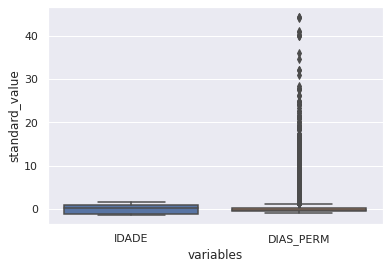

In [12]:
#GERANDO BOXPLOTS
sns.set(rc={'figure.figsize':(15, 11)})

box = sns.boxplot(x = "variables", y = "standard_value", data = sih_box2)
box

In [13]:
#SELECIONANDO DADOS COM DISTRIBUIÇÃO MAIOR QUE -1.96 E MENOR QUE 1.96
sih_box = pd.DataFrame(sih_box.stack()).reset_index()
sih_box.drop('level_0', axis = 1, inplace = True)
sih_box.rename(columns = {'level_1':'variables_originals', 0:'value'}, inplace = True)

sih_box = pd.concat([sih_box.reset_index(drop=True), sih_box2.reset_index(drop=True)], axis=1)
sih_box = sih_box[(sih_box['standard_value'] >= -1.96) & (sih_box['standard_value'] <= 1.96)]

In [22]:
#SELECIONANDO VALORES MÍNIMOS E MÁXIMOS 
min_values = pd.DataFrame(sih_box.groupby('variables_originals')['value'].min())
max_values = pd.DataFrame(sih_box.groupby('variables_originals')['value'].max())

min_values, max_values

(                     value
 variables_originals       
 DIAS_PERM              0.0
 IDADE                  0.0,
                      value
 variables_originals       
 DIAS_PERM             21.0
 IDADE                 99.0)

In [23]:
sih_pneumo2 = sih_pneumo2[(sih_pneumo2['DIAS_PERM'] >= max_values.loc['DIAS_PERM', 'value']) & (sih_pneumo2['IDADE'] >= max_values.loc['IDADE', 'value'])]

## 3. Análise descritiva 

#### 3.1 Medidas resumo 

#### 3.2 Medidas resumo 

#### 3.3 Calculando taxa de internação

#### 3.4 Análise de correlação e associação das variáveis